<a href="https://colab.research.google.com/github/nadaz10/8_puzzlegame/blob/main/NLP_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting dataset

In [54]:
!pip install datasets

In [55]:
from datasets import load_dataset, Dataset

In [56]:
sst_dataset = load_dataset('sst')

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for sst contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/sst
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [57]:
print(sst_dataset['train'][500])
print(f"Number of training examples: {len(sst_dataset['train'])}")
print(f"Number of validation examples: {len(sst_dataset['validation'])}")
print(f"Number of test examples: {len(sst_dataset['test'])}")

{'sentence': 'This story still seems timely and important .', 'label': 0.6944400072097778, 'tokens': 'This|story|still|seems|timely|and|important|.', 'tree': '14|14|13|11|9|9|10|12|10|11|12|13|15|15|0'}
Number of training examples: 8544
Number of validation examples: 1101
Number of test examples: 2210


# Preprocessing

Removing the 'tree' column and adjusting the labels to accomodate the 5 classes we want to classify to where:
From 0 to 0.2 (0.2 included) will be class 0 “very negative”.

From 0.2 to 0.4 (0.4 included) will be class 1 “negative”.

From 0.4 to 0.6 (0.6 included) will be class 2 “neutral”.

From 0.6 to 0.8 (0.8 included) will be class 3 “positive”.

From 0.8 to 1.0 (1.0 included) will be class 4 “very positive”.

In [58]:
#converting splits to Pandas DataFrame for manipulation
import pandas as pd
train_df = pd.DataFrame(sst_dataset['train'])
test_df = pd.DataFrame(sst_dataset['test'])
val_df = pd.DataFrame(sst_dataset['validation'])

#function to map float labels to our desired categorical classes
def map_labels_to_categories(label):
    if 0.0 <= label <= 0.2:
        return 0  # very negative
    elif 0.2 < label <= 0.4:
        return 1  # negative
    elif 0.4 < label <= 0.6:
        return 2  # neutral
    elif 0.6 < label <= 0.8:
        return 3  # positive
    elif 0.8 < label <= 1.0:
        return 4  # very positive

#mapping function to create a new column with mapped labels
train_df['mapped_label'] = train_df['label'].apply(map_labels_to_categories)
test_df['mapped_label'] = test_df['label'].apply(map_labels_to_categories)
val_df['mapped_label'] = val_df['label'].apply(map_labels_to_categories)

#dropping the original label column
train_df = train_df.drop('label', axis=1)
test_df = test_df.drop('label', axis=1)
val_df = val_df.drop('label', axis=1)

train_df = train_df.drop(columns=['tree']) #dropping 'tree' column
test_df = test_df.drop(columns=['tree'])
val_df = val_df.drop(columns=['tree'])


#convert the DataFrame back to the datasets format
sst_dataset['train'] = Dataset.from_pandas(train_df)
sst_dataset['test'] = Dataset.from_pandas(test_df)
sst_dataset['validation'] = Dataset.from_pandas(val_df)

#display the updated dataset
print(sst_dataset)

DatasetDict({
    train: Dataset({
        features: ['sentence', 'tokens', 'mapped_label'],
        num_rows: 8544
    })
    validation: Dataset({
        features: ['sentence', 'tokens', 'mapped_label'],
        num_rows: 1101
    })
    test: Dataset({
        features: ['sentence', 'tokens', 'mapped_label'],
        num_rows: 2210
    })
})


In [59]:
#analyzing the distribution of labels
train_label_distribution = train_df['mapped_label'].value_counts().sort_index()
test_label_distribution = test_df['mapped_label'].value_counts().sort_index()
val_label_distribution = val_df['mapped_label'].value_counts().sort_index()

print("Training Split Label Distribution:")
print(train_label_distribution)

print("\nTest Split Label Distribution:")
print(test_label_distribution)

print("\nValidation Split Label Distribution:")
print(val_label_distribution)


Training Split Label Distribution:
0    1092
1    2218
2    1624
3    2322
4    1288
Name: mapped_label, dtype: int64

Test Split Label Distribution:
0    279
1    633
2    389
3    510
4    399
Name: mapped_label, dtype: int64

Validation Split Label Distribution:
0    139
1    289
2    229
3    279
4    165
Name: mapped_label, dtype: int64


### Visualisation for us

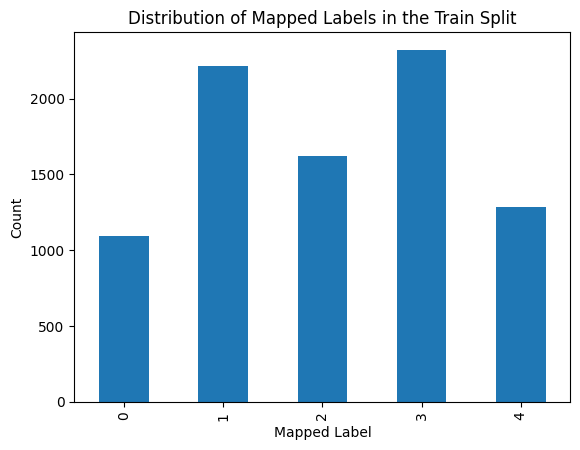

In [60]:
import matplotlib.pyplot as plt
import pandas as pd
train_df = pd.DataFrame(sst_dataset['train']) #convert the 'train' split to a Pandas DataFrame

# Plot the distribution of mapped labels in the 'train' split
train_df['mapped_label'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Mapped Labels in the Train Split')
plt.xlabel('Mapped Label')
plt.ylabel('Count')
plt.show()

In [61]:
# Print the first few rows of the 'train' split to see the transformed data
print(train_df.head())

# Check the unique values in the 'mapped_label' column of the 'train' split to ensure correct mapping
print(train_df['mapped_label'].unique())

# Check for missing values in the 'mapped_label' column of the 'train' split
print(train_df['mapped_label'].isnull().sum())
# # Print the first few rows of the 'train' split to see the transformed data
# print(sst_dataset['train'].head())

# # Check the unique values in the 'mapped_label' column of the 'train' split to ensure correct mapping
# print(sst_dataset['train']['mapped_label'].unique())

# # Check for missing values in the 'mapped_label' column of the 'train' split
# print(sst_dataset['train']['mapped_label'].isnull().sum())

                                            sentence  \
0  The Rock is destined to be the 21st Century 's...   
1  The gorgeously elaborate continuation of `` Th...   
2  Singer\/composer Bryan Adams contributes a sle...   
3  You 'd think by now America would have had eno...   
4               Yet the act is still charming here .   

                                              tokens  mapped_label  
0  The|Rock|is|destined|to|be|the|21st|Century|'s...             3  
1  The|gorgeously|elaborate|continuation|of|``|Th...             4  
2  Singer\/composer|Bryan|Adams|contributes|a|sle...             3  
3  You|'d|think|by|now|America|would|have|had|eno...             2  
4               Yet|the|act|is|still|charming|here|.             3  
[3 4 2 1 0]
0


## Naive Bayes


In [ ]:
import numpy as np

def preprocess_data(data):
    # Tokenize the text
    tokens = [doc.split() for doc in data]

    # Create a vocabulary
    vocab = set(word for doc in tokens for word in doc)

    # Convert text to bag-of-words representation
    bow_representation = []
    for doc in tokens:
        bow = np.zeros(len(vocab))
        for word in doc:
            if word in vocab:
                bow[vocab.index(word)] += 1
        bow_representation.append(bow)

    return bow_representation, vocab

In [ ]:
def train_naive_bayes(data, labels, num_classes):
    # Calculate the number of documents and the vocabulary size
    num_docs = len(data)
    vocab = set(word for doc in data for word in doc)

    # Initialize the log prior and log likelihood matrices
    log_prior = np.zeros(num_classes)
    log_likelihood = np.zeros((len(vocab), num_classes))

    # Calculate the log prior probabilities
    for c in range(num_classes):
        num_c = sum(1 for label in labels if label == c)
        log_prior[c] = np.log(num_c / num_docs)

    # Calculate the log likelihood probabilities
    for c in range(num_classes):
        class_docs = [doc for doc, label in zip(data, labels) if label == c]
        for i, word in enumerate(vocab):
            count = sum(doc[i] for doc in class_docs if i < len(doc))
            log_likelihood[i, c] = np.log((count + 1) / (sum(doc[i] for doc in class_docs) + len(vocab)))

    return log_prior, log_likelihood, vocab

In [ ]:
def test_naive_bayes(test_doc, log_prior, log_likelihood, num_classes, vocab):
    # Convert the test document to a bag-of-words representation
    test_bow = np.zeros(len(vocab))
    for i, word in enumerate(test_doc):
        if word in vocab:
            test_bow[vocab.index(word)] += 1

    # Calculate the log probability for each class
    log_prob = np.zeros(num_classes)
    for c in range(num_classes):
        log_prob[c] = log_prior[c] + np.sum(test_bow * log_likelihood[:, c])

    # Return the class with the highest log probability
    return np.argmax(log_prob)

# Logistic Regression

In [62]:
import numpy as np
from scipy.sparse import lil_matrix
import matplotlib.pyplot as plt


In [ ]:
import numpy as np

def features_extract(data):
    # Initialize a set to store sentence and bigrams pairs
    sentence_bigrams_set = set()
    unique_bigrams = set()

    # Extract relevant information from the dataset
    for i in range(len(data)+1):
        # Initialize a list to store unique word bi-grams
        sentence = data['sentence'][i]
        tokens = data['tokens'][i].split('|')

        # Build bigrams
        bigrams = [f"{tokens[j]} {tokens[j + 1]}" for j in range(len(tokens) -1)]

        # Add the pair to the set
        sentence_bigrams_set.add((sentence, tuple(bigrams)))
        unique_bigrams.update(set(bigrams))

    # Create a list of unique words
    unique_words = sorted(list(set(word for sentence in data['tokens'] for word in sentence.split('|'))))
    print(unique_bigrams)
    # Create a binary matrix to store bigram existence
    bigram_matrix = np.zeros((len(unique_words), len(unique_words)), dtype=int)

    # Populate the matrix
    for i, word1 in enumerate(unique_words):
        for j, word2 in enumerate(unique_words):
            print(word1, word2)
            current_bigram = f"{word1} {word2}"
            if current_bigram in unique_bigrams:
                print("!!!")
                bigram_matrix[i, j] = 1

    return bigram_matrix, unique_words

# Example usage with a dummy dataset
sst_dataset = {
    'tokens': ["apple|orange|banana", "orange|grape|kiwi", "kiwi|banana|apple"],
    'sentence': ["This is the first sentence.", "Another sentence here.", "And one more sentence."]
}

train_dataset = sst_dataset  # Replace with your actual dataset
binary_bigram_matrix, unique_words = features_extract(train_dataset)

# Print the resulting matrix
print("Binary Bigram Matrix:")
print(binary_bigram_matrix)


In [ ]:
def features_extract(data):
    # Initialize a set to store sentence and bigrams pairs
    sentence_bigrams_set = set()
    unique_bigrams = set()
    # Extract relevant information from the dataset
    for i in range(len(data)):
        # Initialize a list to store unique word bi-grams
        sentence = data['sentence'][i]
        tokens = data['tokens'][i].split('|')

        # Build bigrams
        bigrams = [f"{tokens[j]} {tokens[j + 1]}" for j in range(len(tokens) - 1)]
        # print(bigrams)
        # Add the pair to the set

        sentence_bigrams_set.add((sentence, tuple(bigrams)))
        unique_bigrams.update(set(bigrams))

        # Create a list of unique words
    unique_words = sorted(list(set(word for sentence in data['tokens'] for word in sentence.split('|'))))

        # Create a binary matrix to store bigram existence
    bigram_matrix = np.zeros((len(unique_words), len(unique_words)), dtype=int)

        # Populate the matrix
    for i, word1 in enumerate(unique_words):
            for j, word2 in enumerate(unique_words):
              current_bigram = f"{word1} {word2}"
              if current_bigram in unique_bigrams:
                  print("!!!")
                  bigram_matrix[i, j] = 1
    return bigram_matrix, unique_words



# Assuming you have a dataset named 'sst_dataset'
train_dataset = sst_dataset['train']
sentence_bigrams_set, unique_words = features_extract(train_dataset)

# # Print the resulting set
# for sentence, bigrams in sentence_bigrams_set:
#     print("Sentence:", sentence)
#     print("Bigrams:", bigrams)
#     print()



In [ ]:
# Check the sum of the matrix
matrix_sum = np.sum(sentence_bigrams_set)
print("Sum of the matrix:", matrix_sum)
plt.imshow(sentence_bigrams_set, cmap='binary', interpolation='nearest')
plt.title('Binary Bigram Matrix Visualization')
plt.show()

In [81]:
import numpy as np
import matplotlib.pyplot as plt

class MultiClassLogisticRegression:

    def __init__(self, n_iter = 10000, thres=1e-3):
        self.n_iter = n_iter
        self.thres = thres
        self.classes = ['0','1','2','3','4']
        self.class_labels = ['0','1','2','3','4']

    def fit(self, X, y, batch_size=64, lr=0.001, rand_seed=4, verbose=False):
        np.random.seed(rand_seed)
        self.classes = np.unique(y)
        self.class_labels = {c:i for i,c in enumerate(self.classes)}
        X = self.add_bias(X)
        y = self.one_hot(y)
        self.loss = []
        self.weights = np.zeros(shape=(len(self.classes),X.shape[1]))
        self.fit_data(X, y, batch_size, lr, verbose)
        return self

    def fit_data(self, X, y, batch_size, lr, verbose):
        i = 0
        while (not self.n_iter or i < self.n_iter):
            self.loss.append(self.cross_entropy(y, self.predict_(X)))
            idx = np.random.choice(X.shape[0], batch_size)
            X_batch, y_batch = X[idx], y[idx]
            error = y_batch - self.predict_(X_batch)
            update = (lr * np.dot(error.T, X_batch))
            self.weights += update
            if np.abs(update).max() < self.thres: break
            if i % 1000 == 0 and verbose:
                print(' Training Accuray at {} iterations is {}'.format(i, self.evaluate_(X, y)))
            i +=1

    def predict(self, X):
        return self.predict_(self.add_bias(X))

    def predict_(self, X):
        pre_vals = np.dot(X, self.weights.T).reshape(-1,len(self.classes))
        return self.softmax(pre_vals)
    def softmax(self, z):
        return np.exp(z) / np.sum(np.exp(z), axis=1).reshape(-1,1)

    def predict_classes(self, X):
        self.probs_ = self.predict(X)
        return np.vectorize(lambda c: self.classes[c])(np.argmax(self.probs_, axis=1))

    def add_bias(self,X):
        return np.insert(X, 0, 1, axis=1)

    def get_randon_weights(self, row, col):
        return np.zeros(shape=(row,col))

    def one_hot(self, y):
        return np.eye(len(self.classes))[np.vectorize(lambda c: self.class_labels[c])(y).reshape(-1)]

    def score(self, X, y):
        return np.mean(self.predict_classes(X) == y)

    def evaluate_(self, X, y):
        return np.mean(np.argmax(self.predict_(X), axis=1) == np.argmax(y, axis=1))

    def cross_entropy(self, y, probs):
        return -1 * np.mean(y * np.log(probs))



multireg = MultiClassLogisticRegression()
y_hot = multireg.one_hot(train_dataset['mapped_label'])
multireg.fit(sentence_bigrams_set,y_hot)
print(multireg.score(sentence_bigrams_set,y_hot))

IndexError: arrays used as indices must be of integer (or boolean) type

In [77]:
import numpy as np

def softmax(Z):
    exp_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    return exp_Z / np.sum(exp_Z, axis=1, keepdims=True)

def one_hot(y):
        return np.eye(len(self.classes))[np.vectorize(lambda c: self.class_labels[c])(y).reshape(-1)]

def initialize_parameters(num_features, num_classes):
    W = np.random.randn(num_features, num_classes) * 0.01
    b = np.zeros((1, num_classes))
    return W, b

def forward_propagation(X, W, b):
    Z = np.dot(X, W) + b
    A = softmax(Z)
    return A

def compute_loss(A, Y):
    m = Y.shape[0]
    loss = -np.sum(Y * np.log(A + 1e-8)) / m  # Add a small constant to avoid log(0)
    return loss


def backward_propagation(X, A, Y):
    m = X.shape[0]
    dZ = A - Y
    dW = np.dot(X.T, dZ) / m
    db = np.sum(dZ, axis=0, keepdims=True) / m
    return dW, db

def update_parameters(W, b, dW, db, learning_rate):
    W -= learning_rate * dW
    b -= learning_rate * db
    return W, b

def train_multiclass_logistic_regression(X, Y, num_classes, learning_rate, num_epochs):
        np.random.seed(rand_seed)
        self.classes = np.unique(y)
        self.class_labels = {c:i for i,c in enumerate(self.classes)}
        X = self.add_bias(X)
        y = self.one_hot(y)
        self.loss = []
        self.weights = np.zeros(shape=(len(self.classes),X.shape[1]))
        self.fit_data(X, y, batch_size, lr, verbose)
        return self

    def fit_data(self, X, y, batch_size, lr, verbose):
        i = 0
        while (not self.n_iter or i < self.n_iter):
            self.loss.append(self.cross_entropy(y, self.predict_(X)))
            idx = np.random.choice(X.shape[0], batch_size)
            X_batch, y_batch = X[idx], y[idx]
            error = y_batch - self.predict_(X_batch)
            update = (lr * np.dot(error.T, X_batch))
            self.weights += update
            if np.abs(update).max() < self.thres: break
            if i % 1000 == 0 and verbose:
                print(' Training Accuray at {} iterations is {}'.format(i, self.evaluate_(X, y)))
            i +=1



# One-hot encode the labels
Y_train = one_hot(train_dataset['mapped_label'], num_classes=5)

# Training
num_epochs = 1000
learning_rate = 0.01
num_classes = 3

trained_W, trained_b = train_multiclass_logistic_regression(sentence_bigrams_set, Y_train, num_classes, learning_rate, num_epochs)


IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (8544,) (8544,5) 

In [ ]:

import numpy as np

# Assuming you have a binary bigram matrix
np.set_printoptions(threshold=np.inf)

# Print the entire binary bigram matrix
print("Binary Bigram Matrix:")
print(sentence_bigrams_set)

In [68]:
def features_extract(data):
    # Initialize a set to store unique word bi-grams
    unique_bi_grams = set()

    # Extract relevant information from the dataset
    for i in range(len(data)):
        tokens = data['tokens'][i].split('|')

        # Build unique bigrams
        bigrams = {f"{tokens[j]} {tokens[j + 1]}" for j in range(len(tokens) - 1)}

        # Update the set of unique bi-grams
        unique_bi_grams.update(bigrams)

    # Create a vocabulary mapping bi-grams to indices
    vocabulary = {bi_gram: i for i, bi_gram in enumerate(unique_bi_grams)}

    # Initialize a sparse matrix to store the features
    num_samples = len(data)
    num_features = len(vocabulary)
    features = lil_matrix((num_samples, num_features), dtype=np.int8)

    # Fill the sparse matrix with 1s where the bi-gram exists in each sentence
    for i in range(len(data)):
        tokens = data['tokens'][i].split('|')
        sentence_bigrams = {f"{tokens[j]} {tokens[j + 1]}" for j in range(len(tokens) - 1)}

        for bi_gram in sentence_bigrams:
            if bi_gram in vocabulary:
                features[i, vocabulary[bi_gram]] = 1

    return features, vocabulary

# Assuming you have a dataset named 'sst_dataset'
train_dataset = sst_dataset['train']
X_train_sparse_features, vocabulary = features_extract(train_dataset)

In [ ]:
print(X_train_sparse_features)